In [1]:
from datascience import *
import numpy as np
%matplotlib inline

In [2]:
scores = Table.read_table('../Data/scores.csv')
scores.show(3)

Midterm 1,Midterm 2,Mentored
28,20,False
28.5,35,False
23.5,13.5,False


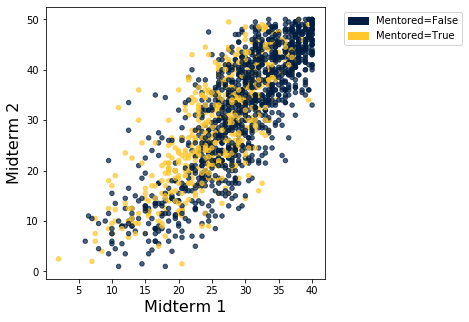

In [6]:
scores.scatter('Midterm 1', 'Midterm 2', group='Mentored')

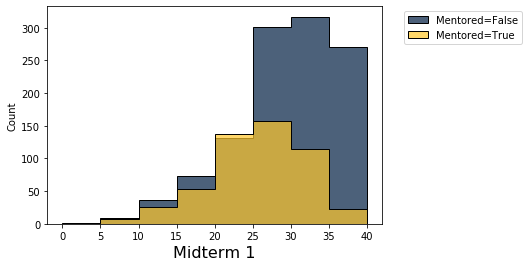

In [8]:
scores.hist('Midterm 1', group='Mentored', bins=np.arange(0,41,5), normed=False)

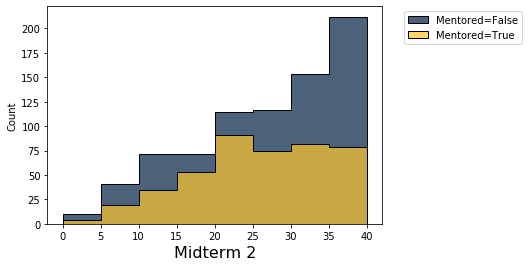

In [9]:
scores.hist('Midterm 2', group='Mentored', bins=np.arange(0,41,5), normed=False)

In [14]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    return np.mean(t.column(y)) - slope(t, x, y)* np.mean(t.column(x))

def fitted_value(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

def residuals(t, x, y):
    return t.column(y) - fitted_value(t, x, y)
    
def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
                    'Fitted', fitted_value(t, x, y),
                    'Residual', residuals(t, x, y)
            )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

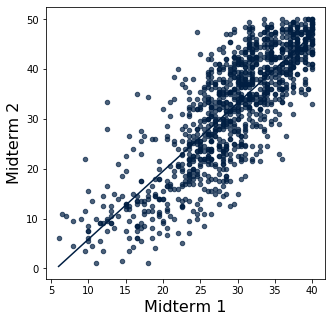

In [15]:
control = scores.where('Mentored', False)
control.scatter('Midterm 1', 'Midterm 2', fit_line=True)

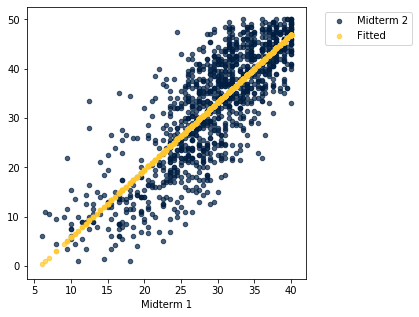

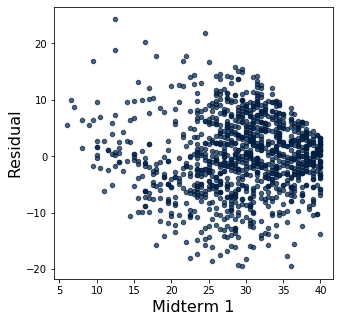

In [16]:
plot_residuals(control, 'Midterm 1', 'Midterm 2')

In [17]:
examples = scores.where('Mentored', False)

def predict_mt2(mt1):
    near = examples.where('Midterm 1', are.between_or_equal_to(mt1-2, mt1+2))
    return near.column('Midterm 2').mean()

predict_mt2(30)

34.11057692307692

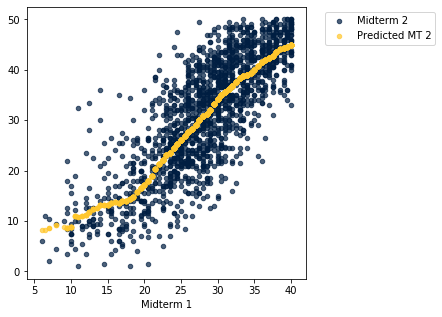

In [18]:
mt1_scores = examples.select('Midterm 1').sort(0, distinct=True)
predictions = mt1_scores.with_column('Predicted MT 2', mt1_scores.apply(predict_mt2, 'Midterm 1'))
t = scores.join('Midterm 1', predictions)
t.drop('Mentored').scatter(0)

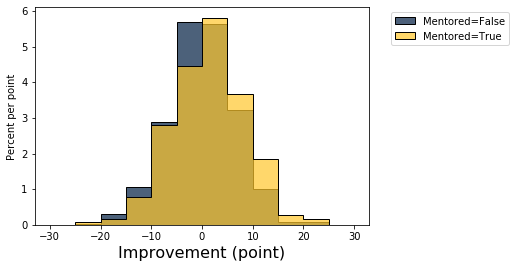

In [19]:
u = t.with_column('Improvement', t.column('Midterm 2')-t.column('Predicted MT 2'))
u.hist('Improvement', bins=np.arange(-30,31,5), group='Mentored', unit='point')